In [188]:
import numpy as np                           # loading numpy model
import pandas as pd                          # loading pandas model
import matplotlib.pyplot as plt              # loading matplotlib.pyplot model

df = pd.read_csv("ML.csv", header=None, names=["Populations", "Profits"])
df[["Populations", "Profits"]].describe()

,Populations,Profits
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


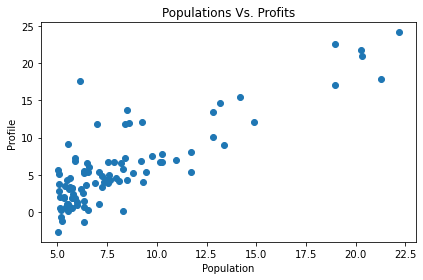

In [189]:
plt.scatter(df["Populations"], df["Profits"])        # ploting the data using scatter function 
plt.xlabel("Population") 
plt.ylabel("Profile")
plt.title("Populations Vs. Profits")
plt.tight_layout()
plt.grid(False)
plt.show()

In [190]:
df.insert(0, 'one', 1)          # inserting a new column with a value of 1
df.shape

(97, 3)

In [191]:
X = df.iloc[:, : df.shape[1] - 1] 
y = df.iloc[:, df.shape[1] - 1 : df.shape[1]]

# conver x,y into matrix and create an matrix with inital values for theta. 
X = np.matrix(X)
y = np.matrix(y) 
theta = np.matrix(np.array([0,0]))
theta

matrix([[0, 0]])

# calculate cost j value

In [192]:
def calculate_cost_j(X, y, theta) :
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(y))

j = calculate_cost_j(X, y, theta) 

j

32.072733877455676

#### # since the const value is big, then need to minmaize it by finding a value for theta0 and theta1 that can minimaize the j 
### using gradient desinte to find the value for theta0 and theta1 that minmize j

In [203]:
def gradient_desinte(X, y, theta, alpha, iterations) :
    tempTheta = np.matrix(np.zeros(theta.shape))
    parameters = theta.shape[1]
    cost_j = np.zeros(iterations) 
    
    for i in range(iterations) :
        value = (X * theta.T) - y 
        
        for j in range(parameters) :
            term = np.multiply(value, X[:, j]) 
            tempTheta[0, j] = theta[0, j] - ((alpha / len(y)) * np.sum(term))
        theta = tempTheta 
        cost_j[i] = calculate_cost_j(X, y, theta) 
        
    return theta, cost_j
            
alpha = 0.01 
iterations = 1000
theta, cost_j = gradient_desinte(X, y, theta, alpha, iterations)
theta

matrix([[-3.24961469,  1.12811924]])

In [236]:
X = np.linspace(data.Populations.min() , data.Populations.max(), 100)
linearEquation = theta_valeu[0, 0] + (theta_valeu[0, 1] * X)

linearEquation

array([ 2.42539308,  2.62097407,  2.81655506,  3.01213605,  3.20771704,
        3.40329803,  3.59887902,  3.79446001,  3.990041  ,  4.18562199,
        4.38120298,  4.57678397,  4.77236495,  4.96794594,  5.16352693,
        5.35910792,  5.55468891,  5.7502699 ,  5.94585089,  6.14143188,
        6.33701287,  6.53259386,  6.72817485,  6.92375584,  7.11933683,
        7.31491782,  7.51049881,  7.7060798 ,  7.90166079,  8.09724177,
        8.29282276,  8.48840375,  8.68398474,  8.87956573,  9.07514672,
        9.27072771,  9.4663087 ,  9.66188969,  9.85747068, 10.05305167,
       10.24863266, 10.44421365, 10.63979464, 10.83537563, 11.03095662,
       11.2265376 , 11.42211859, 11.61769958, 11.81328057, 12.00886156,
       12.20444255, 12.40002354, 12.59560453, 12.79118552, 12.98676651,
       13.1823475 , 13.37792849, 13.57350948, 13.76909047, 13.96467146,
       14.16025245, 14.35583344, 14.55141442, 14.74699541, 14.9425764 ,
       15.13815739, 15.33373838, 15.52931937, 15.72490036, 15.92

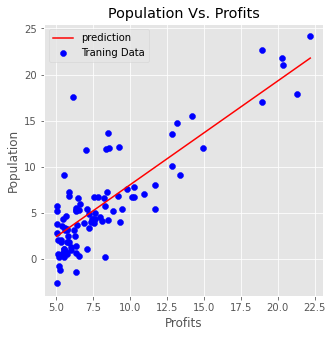

In [261]:
ploting, ax = plt.subplots(figsize = (5,5)) 

plt.scatter(data.Populations, data.Profits,  color="blue", label="Traning Data")

ax.plot(X, linearEquation, color="r", label="prediction")
ax.set_xlabel("Profits")
ax.set_ylabel("Population")
ax.set_title("Population Vs. Profits")
ax.legend(loc=2)
plt.show()